In [64]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pandas
import tqdm
import pandas as pd

In [24]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

## 1-2- Creating Dataset

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
# Making classification dataset
X, y = make_classification(
    n_samples = 1000,
    n_features = 3,
    n_classes = 4,
    n_informative = 3,
    n_redundant = 0,
    n_repeated = 0,
    n_clusters_per_class = 1,
    class_sep = 1,
    random_state = 69
)
print(f'Shape of input (X) is {X.shape}')
print(f'Shape of label (y) is {y.shape}')

Shape of input (X) is (1000, 3)
Shape of label (y) is (1000,)


Plotting the distribution of the dataset

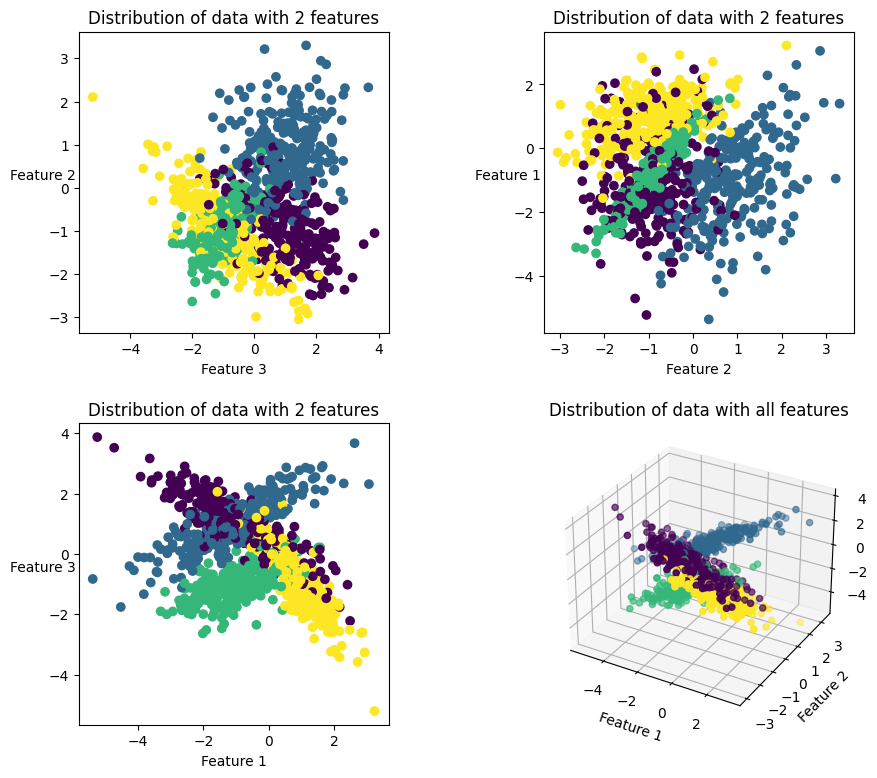

In [ ]:
fig = plt.figure(figsize=(10,9))
# Plotting data in 2 dimentions
for i in range(3):

    plt.subplot(2,2,i+1)
    plt.scatter(X[:,2-i],X[:,1-i],c=y)
    plt.xlabel(f'Feature {3-i}')
    plt.ylabel(f'Feature {2-i if 2-i !=0 else 3}', rotation=0)
    plt.subplots_adjust(wspace=0.5, hspace = 0.3)
    plt.title('Distribution of data with 2 features')

# Plotting data in 3 dimentions
ax = fig.add_subplot(224, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=y)
plt.title('Distribution of data with all features')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Save the figure
plt.savefig('data_dist.png')

## 1-3: Linear models

Split data into train and validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.2, # 80% Train & 20% Test
    shuffle = True,
    random_state = 69
)
train_max = np.mean(x_train)
val_max = np.mean(x_val)

# Normalizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

print(f'Mean value of train data: \nBEFORE normalizaing -> {train_max}\nAFTER normalizaing -> {np.mean(x_train)}')
print(f'Mean value of validation data: \nBEFORE normalizaing -> {val_max}\nAFTER normalizaing -> {np.mean(x_val)}')

Mean value of train data: 
BEFORE normalizaing -> -0.3230793379250814
AFTER normalizaing -> -1.8355687340469255e-16
Mean value of validation data: 
BEFORE normalizaing -> -0.3964710505512714
AFTER normalizaing -> -0.0538849148845892


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model= LogisticRegression(
    penalty = 'l2',
    fit_intercept = True,
    solver = 'sag',
    max_iter = 2,
    random_state = 69
)

Iterations

In [ ]:
# Train for different iterations
lr_acc_train = []
lr_acc_val = []
lr_model.solver = 'sag'
pbar = tqdm.trange(30, desc='Iterations')
for iteration in pbar:

    lr_model.max_iter = iteration
    lr_model.fit(x_train,y_train)
    lr_acc_train.append(lr_model.score(x_train,y_train))
    lr_acc_val.append(lr_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(lr_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(lr_acc_train)*100:.2f}%')
best_iter_val = np.argmax(lr_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(lr_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 30/30 [00:00<00:00, 67.00it/s]


The best outcome on training data is for iteration 7 with accuracy of 85.25%
The best outcome on validation data is for iteration 2 with accuracy of 82.50%


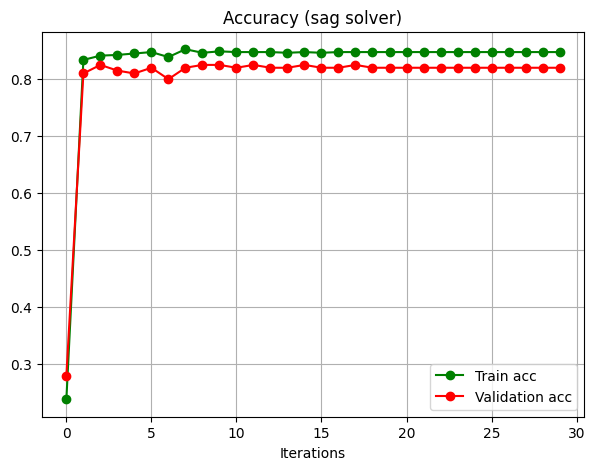

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(lr_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lr_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy (sag solver)')
plt.grid(True)
plt.legend()
plt.savefig('sover.png')

Solvers

In [ ]:
solvers = ['lbfgs','liblinear','newton-cg', 'newton-cholesky','sag','saga']
pens = ['l2','l2','l2','l2','l2','l2']
lr_model.max_iter = 15
for i in range(len(solvers)):

    lr_model.penalty = pens[i]
    lr_model.solver = solvers[i]
    lr_model.fit(x_train,y_train)
    score_train = lr_model.score(x_train,y_train)
    score_val = lr_model.score(x_val,y_val)
    print(f'Solver: {lr_model.solver}\nTrain Accuracy: {score_train:.2f}\nValidatoin Accuracy: {score_val:.2f}', end = '\n\n')

Solver: lbfgs
Train Accuracy: 0.85
Validatoin Accuracy: 0.82

Solver: liblinear
Train Accuracy: 0.83
Validatoin Accuracy: 0.81

Solver: newton-cg
Train Accuracy: 0.85
Validatoin Accuracy: 0.82

Solver: newton-cholesky
Train Accuracy: 0.83
Validatoin Accuracy: 0.81

Solver: sag
Train Accuracy: 0.85
Validatoin Accuracy: 0.82

Solver: saga
Train Accuracy: 0.85
Validatoin Accuracy: 0.82



### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_model = SGDClassifier(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    learning_rate = 'constant',
    eta0 = 0.015,
    alpha = 0.00059,
    random_state = 69
)

Iterations

In [ ]:
# Train for different iterations
sgd_acc_train = []
sgd_acc_val = []
pbar = tqdm.trange(50, desc='Iterations')
for iteration in pbar:

    sgd_model.max_iter = iteration+1
    sgd_model.fit(x_train,y_train)
    sgd_acc_train.append(sgd_model.score(x_train,y_train))
    sgd_acc_val.append(sgd_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_val = np.argmax(sgd_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(sgd_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 50/50 [00:00<00:00, 68.10it/s]


The best outcome on training data is for iteration 33 with accuracy of 83.12%
The best outcome on validation data is for iteration 20 with accuracy of 79.00%


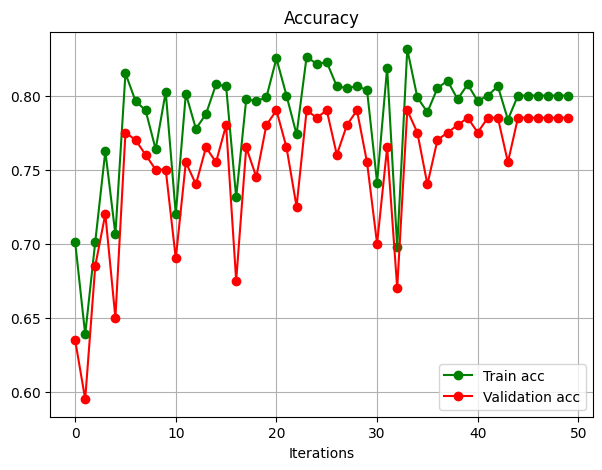

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(sgd_acc_train, marker='o', color='green',label='Train acc')
plt.plot(sgd_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

Learning rate

In [ ]:
sgd_model.learning_rate = 'constant'
start_lr = -7
end_lr = 2
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different learning rates
sgd_acc_train = []
sgd_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for learn_rate in pbar:

    sgd_model.eta0 = learn_rate
    sgd_model.fit(x_train,y_train)
    sgd_acc_train.append(sgd_model.score(x_train,y_train))
    sgd_acc_val.append(sgd_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for learning rate {lrs[best_iter]:.2g} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_val = np.argmax(sgd_acc_val)
print(f'The best outcome on validation data is for learning rate {lrs[best_iter_val]:.2g} with accuracy of {np.max(sgd_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:01<00:00, 58.12it/s]


The best outcome on training data is for learning rate 0.0053 with accuracy of 82.62%
The best outcome on validation data is for learning rate 0.015 with accuracy of 80.50%


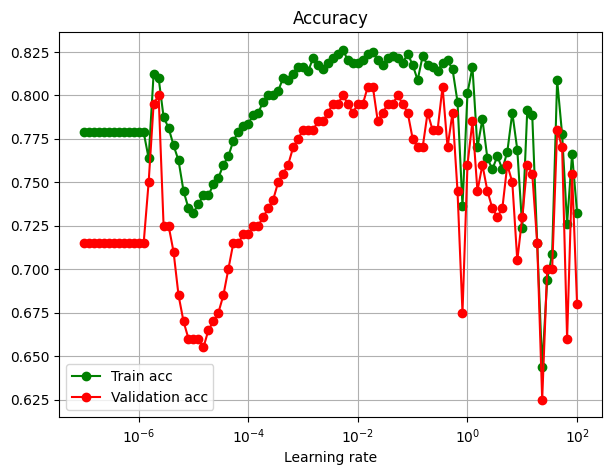

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(lrs,sgd_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,sgd_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Learning rate')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

Regularization constant

In [ ]:
start_lr = -8
end_lr = 0
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different regularization canstants
sgd_acc_train = []
sgd_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for cons in pbar:

    sgd_model.alpha = cons
    sgd_model.fit(x_train,y_train)
    sgd_acc_train.append(sgd_model.score(x_train,y_train))
    sgd_acc_val.append(sgd_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for regularization constant {lrs[best_iter]:.2g} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_val = np.argmax(sgd_acc_val)
print(f'The best outcome on validation data is for regularization constant {lrs[best_iter_val]:.2g} with accuracy of {np.max(sgd_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:00<00:00, 121.00it/s]


The best outcome on training data is for regularization constant 7.6e-05 with accuracy of 83.12%
The best outcome on validation data is for regularization constant 0.00059 with accuracy of 81.00%


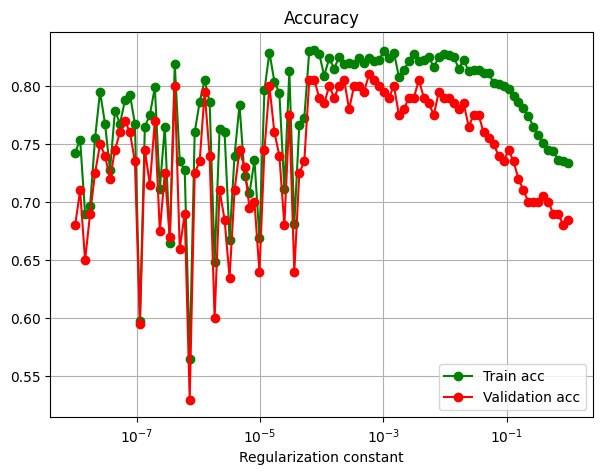

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(lrs,sgd_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,sgd_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Regularization constant')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
pct_model = Perceptron(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 10,
    eta0 = 1.9,
    random_state = 69
)

Iterations

In [ ]:
# Train for different iterations
pct_acc_train = []
pct_acc_val = []
pbar = tqdm.trange(15, desc='Iterations')
for iteration in pbar:

    pct_model.max_iter = iteration+1
    pct_model.fit(x_train,y_train)
    pct_acc_train.append(pct_model.score(x_train,y_train))
    pct_acc_val.append(pct_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pct_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(pct_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pct_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(pct_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 15/15 [00:00<00:00, 86.80it/s]


The best outcome on training data is for iteration 5 with accuracy of 81.88%
The best outcome on validation data is for iteration 3 with accuracy of 78.50%


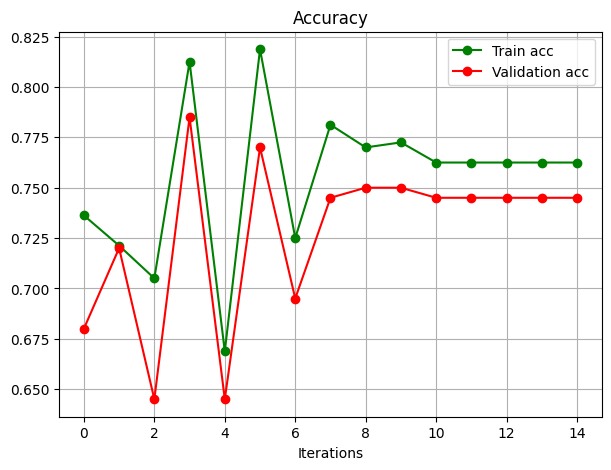

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(pct_acc_train, marker='o', color='green',label='Train acc')
plt.plot(pct_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('pct.png')

Learning rate

In [ ]:
pct_model.learning_rate = 'constant'
start_lr = -7
end_lr = 2
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different learning rates
pct_acc_train = []
pct_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for learn_rate in pbar:

    pct_model.eta0 = learn_rate
    pct_model.fit(x_train,y_train)
    pct_acc_train.append(pct_model.score(x_train,y_train))
    pct_acc_val.append(pct_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pct_acc_train)
print(f'\nThe best outcome on training data is for learning rate {lrs[best_iter]:.2g} with accuracy of {np.max(pct_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pct_acc_val)
print(f'The best outcome on validation data is for learning rate {lrs[best_iter_val]:.2g} with accuracy of {np.max(pct_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:00<00:00, 170.99it/s]


The best outcome on training data is for learning rate 1.9 with accuracy of 83.38%
The best outcome on validation data is for learning rate 1.9 with accuracy of 80.00%


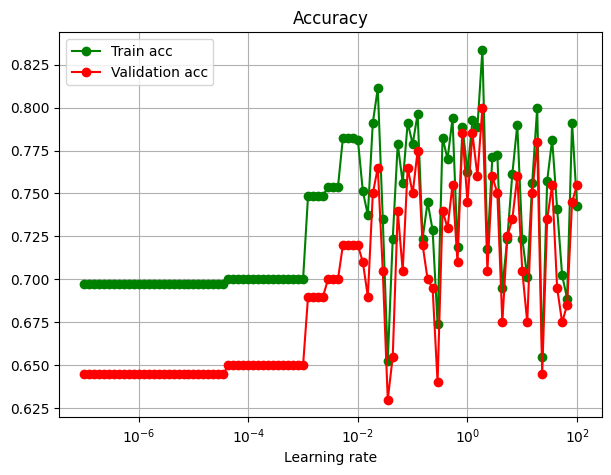

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(lrs,pct_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,pct_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Learning rate')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

Regularization constatn

In [ ]:
start_lr = -8
end_lr = 0
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different regularization canstants
pct_acc_train = []
pct_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for cons in pbar:

    pct_model.alpha = cons
    pct_model.fit(x_train,y_train)
    pct_acc_train.append(pct_model.score(x_train,y_train))
    pct_acc_val.append(pct_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pct_acc_train)
print(f'\nThe best outcome on training data is for regularization constant {lrs[best_iter]:.2g} with accuracy of {np.max(pct_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pct_acc_val)
print(f'The best outcome on validation data is for regularization constant {lrs[best_iter_val]:.2g} with accuracy of {np.max(pct_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:00<00:00, 132.31it/s]


The best outcome on training data is for regularization constant 9.3e-08 with accuracy of 81.50%
The best outcome on validation data is for regularization constant 3.2e-06 with accuracy of 78.50%


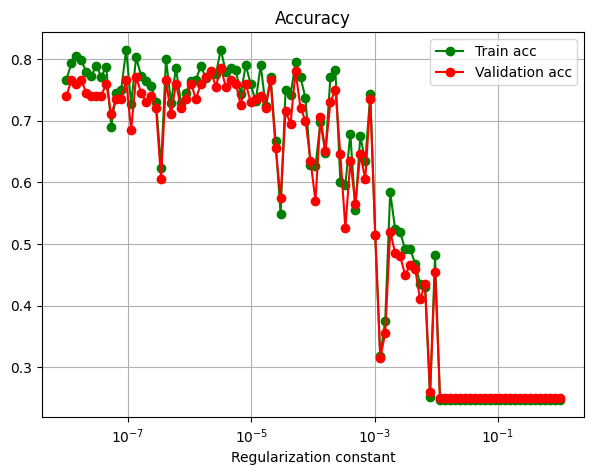

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(lrs,pct_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,pct_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Regularization constant')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('pct.png')

### Passive Agressive Classifire

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
pac_model = PassiveAggressiveClassifier(
    fit_intercept = True,
    max_iter = 9,
    random_state = 69
)

Iterations

In [ ]:
# Train for different iterations
pac_acc_train = []
pac_acc_val = []
pbar = tqdm.trange(15, desc='Iterations')
for iteration in pbar:

    pac_model.max_iter = iteration+1
    pac_model.fit(x_train,y_train)
    pac_acc_train.append(pac_model.score(x_train,y_train))
    pac_acc_val.append(pac_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pac_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(pac_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pac_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(pac_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 15/15 [00:00<00:00, 166.76it/s]


The best outcome on training data is for iteration 1 with accuracy of 81.75%
The best outcome on validation data is for iteration 9 with accuracy of 78.00%


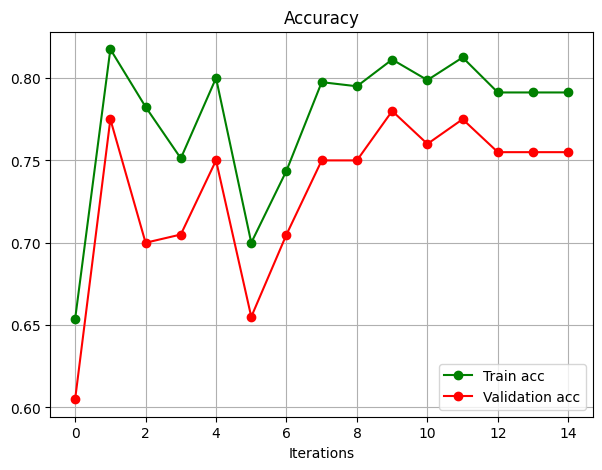

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(pac_acc_train, marker='o', color='green',label='Train acc')
plt.plot(pac_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('pac.png')

## 1-4 Desision boundaries and areas

In [99]:
from mlxtend.plotting import plot_decision_regions
def plot_region(x,y,model,name='Train data'):

    def miss_class():

        hat = model.predict(x)
        miss = np.where(y != hat)
        miss = x[miss]
        return miss

    scatter_highlight_kwargs = {'s': 60, 'label': 'Missclassified', 'alpha': 0.7, 'linewidth':2}
    ax = plot_decision_regions(x,
                        y,
                        clf=model,
                        zoom_factor = 1.,
                        legend = 0,
                        X_highlight = miss_class(),
                        scatter_highlight_kwargs =  scatter_highlight_kwargs

    )
    ax.legend(loc='upper left')
    ax.set_title(f'Decision region for {name}')
    ax.set_xlabel('Latent feature 1')
    ax.set_ylabel('Latent feature 2')


Using T-SNE to be able to visualiza the data in 2 dimentions

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(
    n_components = 2,
    verbose = 0,
    random_state = 69
)

In [ ]:
data_reduced = tsne.fit_transform(X,y)

In [ ]:
x_train_r, x_val_r, y_train_r, y_val_r = train_test_split(
    data_reduced,
    y,
    test_size = 0.2, # 80% Train & 20% Test
    shuffle = True,
    random_state = 69
)

# scaling
scaler = StandardScaler().fit(x_train_r)
x_train_r_s  = scaler.transform(x_train_r)
x_val_r_s  = scaler.transform(x_val_r)

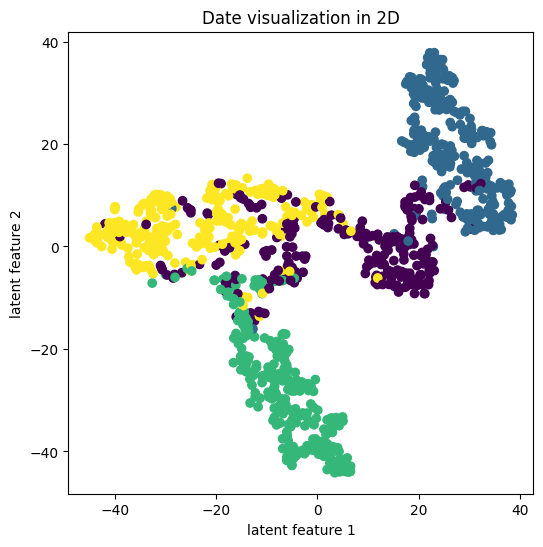

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(
    data_reduced[:,0],
    data_reduced[:,1],
    c = y
)
plt.title('Date visualization in 2D')
plt.xlabel('latent feature 1')
plt.ylabel('latent feature 2')
plt.savefig('reduced_vis.png')

Visualization

In [ ]:
# Initializaing models for visualizaiton puroses
lr_model= LogisticRegression(
    penalty = 'l2',
    fit_intercept = True,
    solver = 'sag',
    max_iter = 2,
    random_state = 69
)

sgd_model = SGDClassifier(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    learning_rate = 'constant',
    eta0 = 0.015,
    alpha = 0.00059,
    random_state = 69
)

pct_model = Perceptron(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    eta0 = 1.9,
    random_state = 69
)

pac_model = PassiveAggressiveClassifier(
    fit_intercept = True,
    max_iter = 10,
    random_state = 69
)

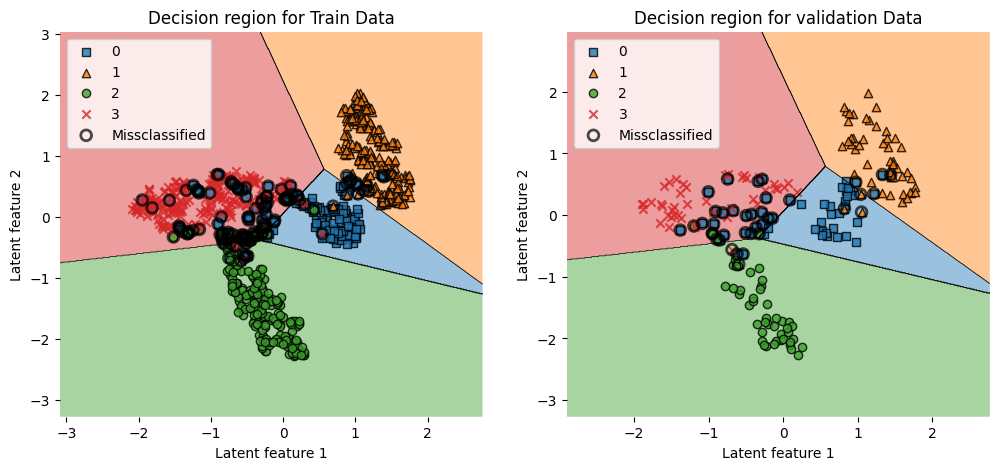

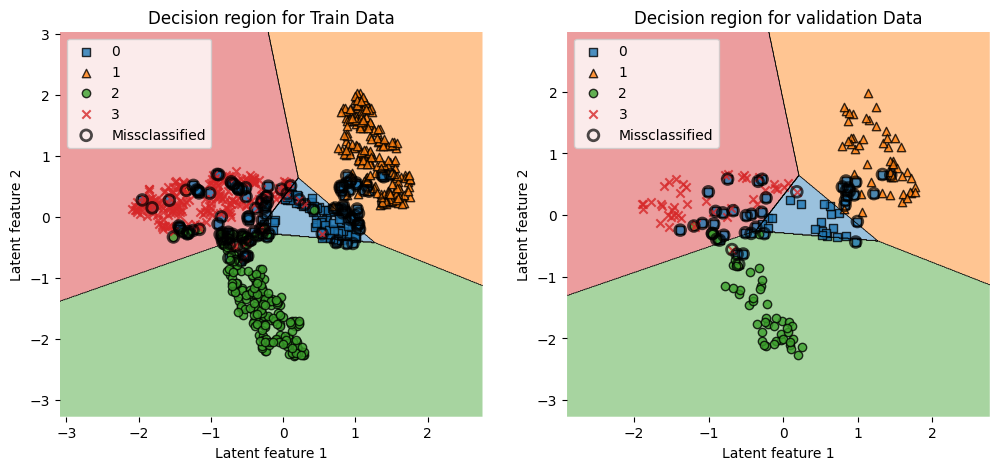

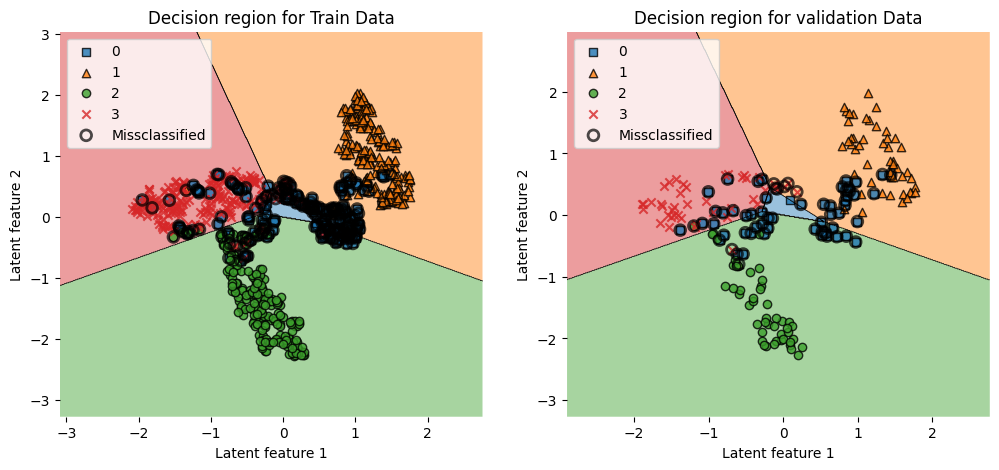

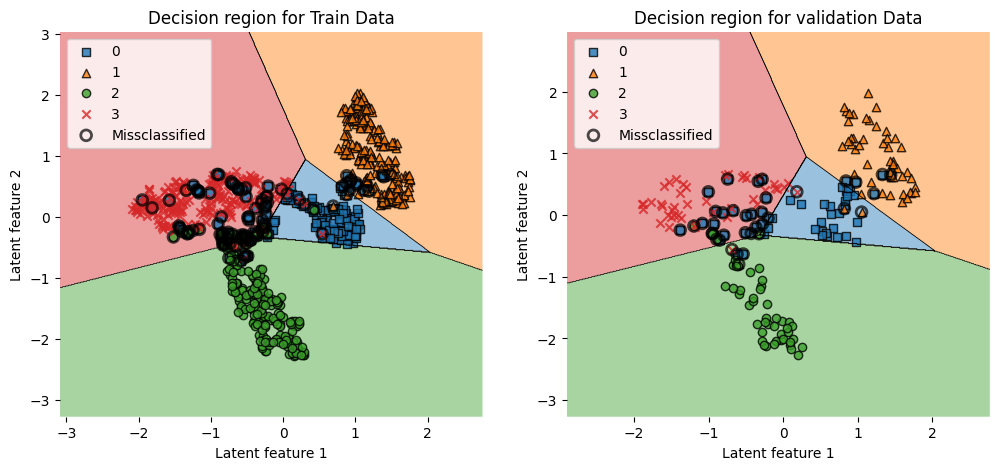

In [ ]:
models = [lr_model, sgd_model, pct_model, pac_model]
model_names = ['lr_model', 'sgd_model', 'pct_model', 'pac_model']
# Train model with new latent data
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_train)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s,
                y_train_r,
                m,
                'Train Data'
    )
    plt.subplot(1,2,2)
    plot_region(x_val_r_s,
                y_val_r,
                m,
                'validation Data'
    )
    image_name = model_names[i]+'.png'
    plt.savefig(image_name)

## 1-5: Draw data

In [ ]:
# Installing required libraries
!pip install drawdata
!pip install pandas polars

In [1]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

Saving data

In [39]:
# Get the drawn data as a list of dictionaries
new_data = widget.data

# Get the drawn data as a dataframe
pandas_data = widget.data_as_pandas
polars_data = widget.data_as_polars

In [40]:
print(f'Shape of drawn data is {pandas_data.shape}')
pandas_data.head()

Shape of drawn data is (3504, 4)


x           y    color label
0   90.538044  316.306034  #1f77b4     a
1   88.802248  339.499024  #1f77b4     a
2   98.982651  312.549852  #1f77b4     a
3  104.882094  317.394244  #1f77b4     a
4  116.697923  327.698127  #1f77b4     a

In [41]:
print('Number of data points is as follows:')
pandas_data.label.value_counts()

Number of data points is as follows:


c    1323
d     866
b     724
a     591
Name: label, dtype: int64

In [42]:
new_x = pandas_data[['x','y']].values

In [45]:
print(f'lable values before correction are: {np.unique(pandas_data.label.values)}')
pandas_data['label'].replace({'a':0 , 'b':1 , 'c':2 , 'd':3}, inplace=True)
new_y = pandas_data[['label']].values
print(f'label values after correction are: {np.unique(pandas_data.label.values)}')

lable values before correction are: ['a' 'b' 'c' 'd']
label values after correction are: [0 1 2 3]


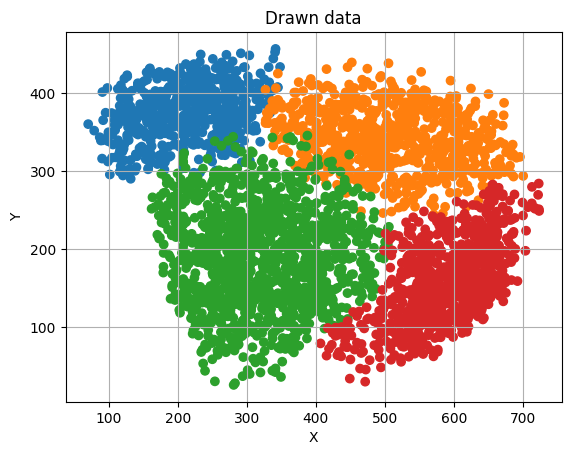

In [47]:
plt.scatter(new_x[:,0],new_x[:,1], c=pandas_data['color'])
plt.title('Drawn data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

Balancing data

In [31]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(random_state = 69)
x_bal, y_bal = smote.fit_resample(new_x,new_y)

In [65]:
# Creating Balanced dataframe
bal_data = {
    'x': x_bal[:,0],
    'y': x_bal[:,1],
    'label': y_bal
}
bal_data = pd.DataFrame(bal_data)

In [67]:
print(f'Number of data in each class before balancing:')
print(pandas_data['label'].value_counts())
print('Number of data in each class after balancing:')
print(bal_data.label.value_counts())

Number of data in each class before balancing:
2    1323
3     866
1     724
0     591
Name: label, dtype: int64
Number of data in each class after balancing:
0    1323
1    1323
2    1323
3    1323
Name: label, dtype: int64


other preprocessings

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X = x_bal
y = y_bal
x_train, x_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.2, # 80% Train & 20% Test
    shuffle = True,
    random_state = 69
)
train_max = np.mean(x_train)
val_max = np.mean(x_val)

# Normalizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

print(f'Mean value of train data: \nBEFORE normalizaing -> {train_max}\nAFTER normalizaing -> {np.mean(x_train)}')
print(f'Mean value of validation data: \nBEFORE normalizaing -> {val_max}\nAFTER normalizaing -> {np.mean(x_val)}')

Mean value of train data: 
BEFORE normalizaing -> 336.8340242533887
AFTER normalizaing -> 3.5834526673396145e-15
Mean value of validation data: 
BEFORE normalizaing -> 336.38553746867785
AFTER normalizaing -> -0.006061250435698513


Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr_model= LogisticRegression(
    penalty = 'l2',
    fit_intercept = True,
    solver = 'sag',
    max_iter = 2,
    random_state = 69
)

In [73]:
# Train for different iterations
lr_acc_train = []
lr_acc_val = []
lr_model.solver = 'sag'
pbar = tqdm.trange(30, desc='Iterations')
for iteration in pbar:

    lr_model.max_iter = iteration
    lr_model.fit(x_train,y_train)
    lr_acc_train.append(lr_model.score(x_train,y_train))
    lr_acc_val.append(lr_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(lr_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(lr_acc_train)*100:.2f}%')
best_iter_val = np.argmax(lr_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(lr_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 30/30 [00:00<00:00, 54.05it/s]


The best outcome on training data is for iteration 7 with accuracy of 97.45%
The best outcome on validation data is for iteration 8 with accuracy of 98.49%


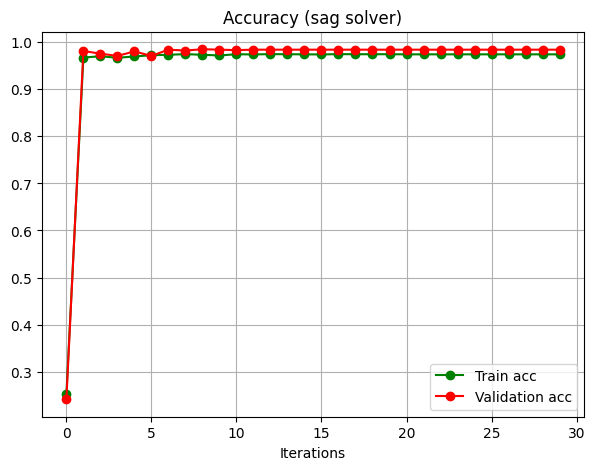

In [74]:
plt.figure(figsize=(7,5))
plt.plot(lr_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lr_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy (sag solver)')
plt.grid(True)
plt.legend()
plt.savefig('sover.png')

In [75]:
solvers = ['lbfgs','liblinear','newton-cg', 'newton-cholesky','sag','saga']
pens = ['l2','l2','l2','l2','l2','l2']
lr_model.max_iter = 15
for i in range(len(solvers)):

    lr_model.penalty = pens[i]
    lr_model.solver = solvers[i]
    lr_model.fit(x_train,y_train)
    score_train = lr_model.score(x_train,y_train)
    score_val = lr_model.score(x_val,y_val)
    print(f'Solver: {lr_model.solver}\nTrain Accuracy: {score_train:.2f}\nValidatoin Accuracy: {score_val:.2f}', end = '\n\n')

Solver: lbfgs
Train Accuracy: 0.97
Validatoin Accuracy: 0.98

Solver: liblinear
Train Accuracy: 0.96
Validatoin Accuracy: 0.97

Solver: newton-cg
Train Accuracy: 0.97
Validatoin Accuracy: 0.98

Solver: newton-cholesky
Train Accuracy: 0.97
Validatoin Accuracy: 0.97

Solver: sag
Train Accuracy: 0.97
Validatoin Accuracy: 0.98

Solver: saga
Train Accuracy: 0.97
Validatoin Accuracy: 0.98



SGD

In [76]:
from sklearn.linear_model import SGDClassifier

In [102]:
sgd_model = SGDClassifier(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    learning_rate = 'constant',
    eta0 = 0.015,
    alpha = 0.00059,
    random_state = 69
)

In [78]:
# Train for different iterations
sgd_acc_train = []
sgd_acc_val = []
pbar = tqdm.trange(50, desc='Iterations')
for iteration in pbar:

    sgd_model.max_iter = iteration+1
    sgd_model.fit(x_train,y_train)
    sgd_acc_train.append(sgd_model.score(x_train,y_train))
    sgd_acc_val.append(sgd_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_val = np.argmax(sgd_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(sgd_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 50/50 [00:01<00:00, 48.04it/s]


The best outcome on training data is for iteration 11 with accuracy of 96.24%
The best outcome on validation data is for iteration 11 with accuracy of 96.79%


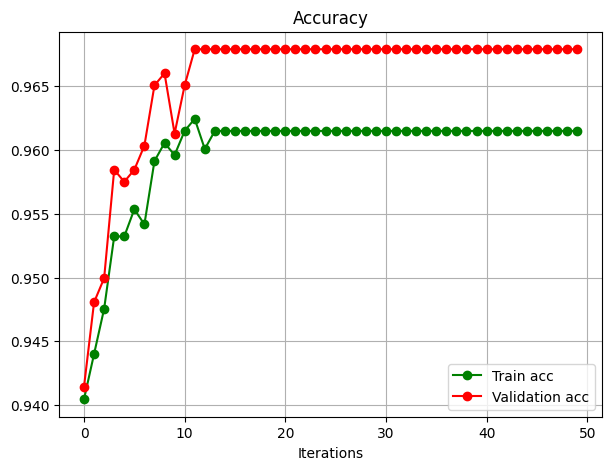

In [79]:
plt.figure(figsize=(7,5))
plt.plot(sgd_acc_train, marker='o', color='green',label='Train acc')
plt.plot(sgd_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

In [80]:
sgd_model.learning_rate = 'constant'
start_lr = -7
end_lr = 2
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different learning rates
sgd_acc_train = []
sgd_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for learn_rate in pbar:

    sgd_model.eta0 = learn_rate
    sgd_model.fit(x_train,y_train)
    sgd_acc_train.append(sgd_model.score(x_train,y_train))
    sgd_acc_val.append(sgd_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for learning rate {lrs[best_iter]:.2g} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_val = np.argmax(sgd_acc_val)
print(f'The best outcome on validation data is for learning rate {lrs[best_iter_val]:.2g} with accuracy of {np.max(sgd_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:02<00:00, 42.95it/s]


The best outcome on training data is for learning rate 0.081 with accuracy of 97.02%
The best outcome on validation data is for learning rate 0.028 with accuracy of 97.64%


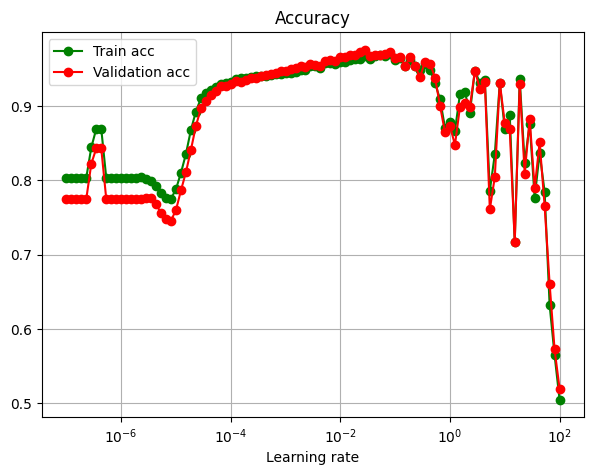

In [81]:
plt.figure(figsize=(7,5))
plt.plot(lrs,sgd_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,sgd_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Learning rate')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

Perceptron


In [82]:
from sklearn.linear_model import Perceptron

In [105]:
pct_model = Perceptron(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    eta0 = 1.9,
    random_state = 69
)

In [88]:
# Train for different iterations
pct_acc_train = []
pct_acc_val = []
pbar = tqdm.trange(30, desc='Iterations')
for iteration in pbar:

    pct_model.max_iter = iteration+1
    pct_model.fit(x_train,y_train)
    pct_acc_train.append(pct_model.score(x_train,y_train))
    pct_acc_val.append(pct_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pct_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(pct_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pct_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(pct_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 30/30 [00:00<00:00, 33.93it/s]


The best outcome on training data is for iteration 10 with accuracy of 91.97%
The best outcome on validation data is for iteration 10 with accuracy of 91.12%


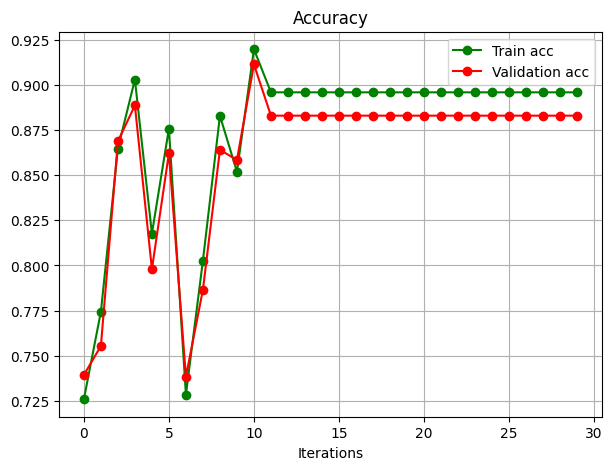

In [89]:
plt.figure(figsize=(7,5))
plt.plot(pct_acc_train, marker='o', color='green',label='Train acc')
plt.plot(pct_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('pct.png')

In [90]:
pct_model.learning_rate = 'constant'
start_lr = -7
end_lr = 2
lrs = np.logspace(start_lr, end_lr, 100)
# Train for different learning rates
pct_acc_train = []
pct_acc_val = []
pbar = tqdm.tqdm(lrs, desc='Iterations')
for learn_rate in pbar:

    pct_model.eta0 = learn_rate
    pct_model.fit(x_train,y_train)
    pct_acc_train.append(pct_model.score(x_train,y_train))
    pct_acc_val.append(pct_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pct_acc_train)
print(f'\nThe best outcome on training data is for learning rate {lrs[best_iter]:.2g} with accuracy of {np.max(pct_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pct_acc_val)
print(f'The best outcome on validation data is for learning rate {lrs[best_iter_val]:.2g} with accuracy of {np.max(pct_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 100/100 [00:00<00:00, 102.04it/s]


The best outcome on training data is for learning rate 0.81 with accuracy of 96.41%
The best outcome on validation data is for learning rate 0.81 with accuracy of 96.03%


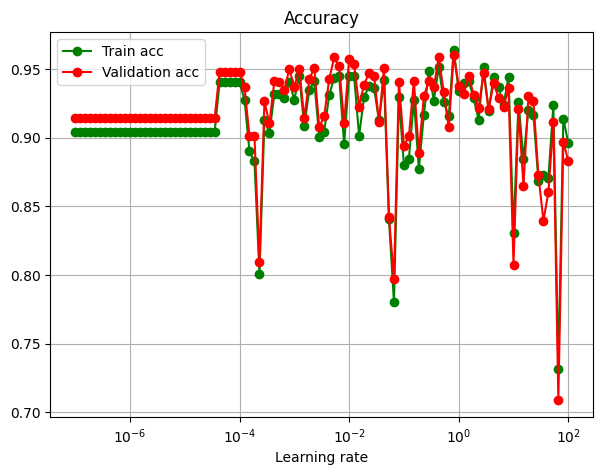

In [91]:
plt.figure(figsize=(7,5))
plt.plot(lrs,pct_acc_train, marker='o', color='green',label='Train acc')
plt.plot(lrs,pct_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Learning rate')
plt.xscale('log')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('sgd.png')

Passive Agressive Classifier

In [92]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [93]:
pac_model = PassiveAggressiveClassifier(
    fit_intercept = True,
    max_iter = 9,
    random_state = 69
)

In [96]:
# Train for different iterations
pac_acc_train = []
pac_acc_val = []
pbar = tqdm.trange(30, desc='Iterations')
for iteration in pbar:

    pac_model.max_iter = iteration+1
    pac_model.fit(x_train,y_train)
    pac_acc_train.append(pac_model.score(x_train,y_train))
    pac_acc_val.append(pac_model.score(x_val,y_val))
pbar.close()

# Best iteration
best_iter = np.argmax(pac_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter} with accuracy of {np.max(pac_acc_train)*100:.2f}%')
best_iter_val = np.argmax(pac_acc_val)
print(f'The best outcome on validation data is for iteration {best_iter_val} with accuracy of {np.max(pac_acc_val)*100:.2f}%')

Iterations: 100%|██████████| 30/30 [00:00<00:00, 58.63it/s]



The best outcome on training data is for iteration 13 with accuracy of 96.53%
The best outcome on validation data is for iteration 11 with accuracy of 97.92%


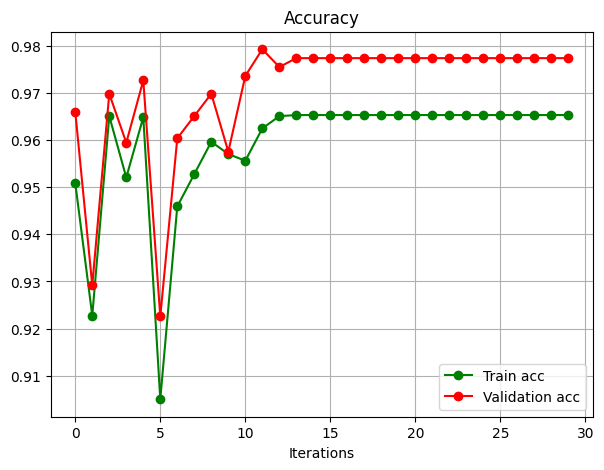

In [97]:
plt.figure(figsize=(7,5))
plt.plot(pac_acc_train, marker='o', color='green',label='Train acc')
plt.plot(pac_acc_val, marker='o', color='red',label='Validation acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('pac.png')

Boundary and Area of decision

In [ ]:
# Initializaing models for visualizaiton puroses
lr_model= LogisticRegression(
    penalty = 'l2',
    fit_intercept = True,
    solver = 'sag',
    max_iter = 2,
    random_state = 69
)

sgd_model = SGDClassifier(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    learning_rate = 'constant',
    eta0 = 0.015,
    alpha = 0.00059,
    random_state = 69
)

pct_model = Perceptron(
    penalty = 'l2',
    fit_intercept = True,
    max_iter = 20,
    eta0 = 1.9,
    random_state = 69
)

pac_model = PassiveAggressiveClassifier(
    fit_intercept = True,
    max_iter = 10,
    random_state = 69
)

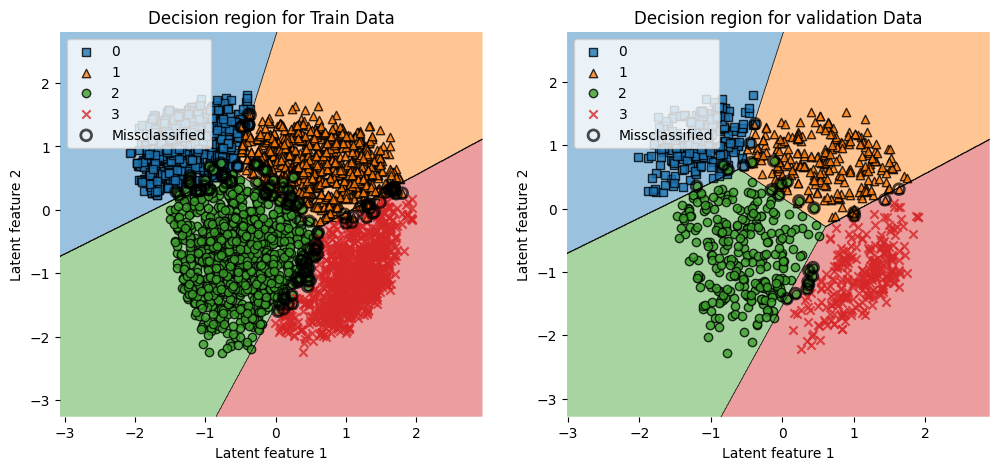

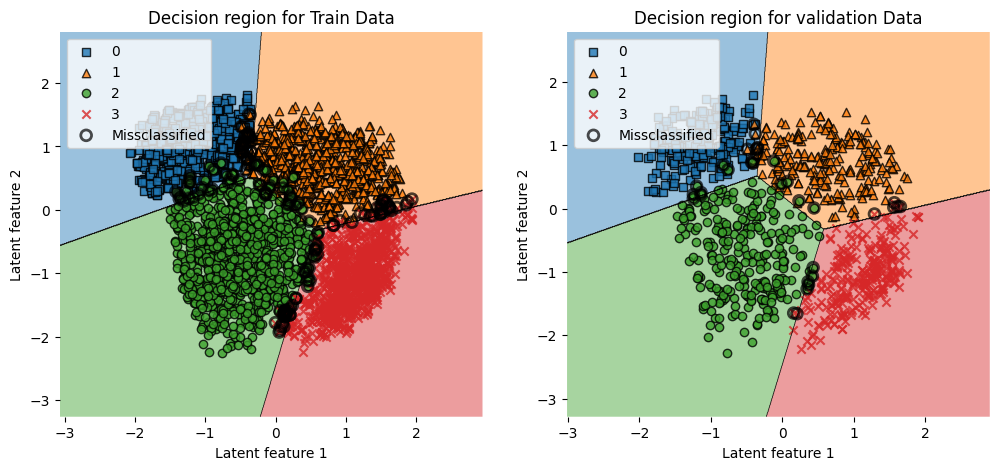

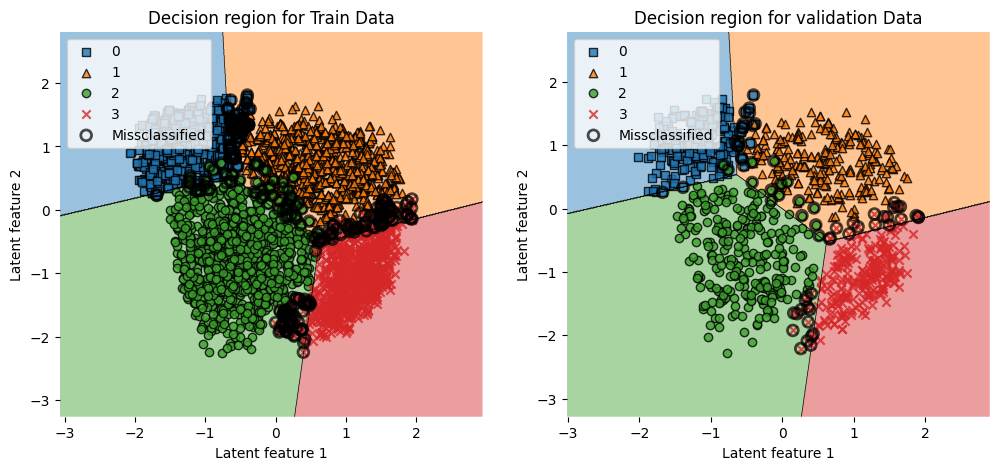

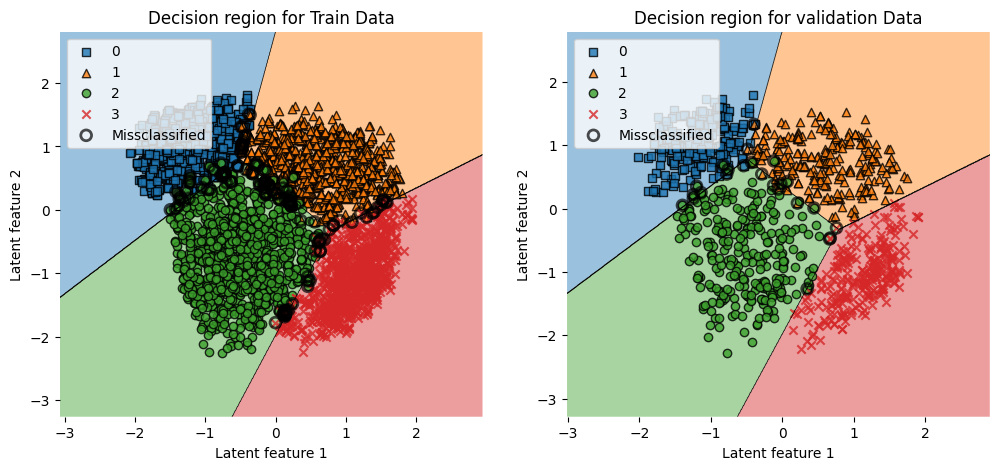

In [106]:
models = [lr_model, sgd_model, pct_model, pac_model]
model_names = ['lr_model', 'sgd_model', 'pct_model', 'pac_model']
# Train model with new latent data
for i, m in enumerate(models):
    m.fit(x_train,y_train)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train,
                y_train,
                m,
                'Train Data'
    )
    plt.subplot(1,2,2)
    plot_region(x_val,
                y_val,
                m,
                'validation Data'
    )
    image_name = model_names[i]+'.png'
    plt.savefig(image_name)